In [1]:
# Density-based spatial clustering of applications with noise.
# it can be use for clustering and outlier detection
# 
# DBSCAN point typer : 
# core
# border 
# outlier
#
# Epsilon Intuation : By increasing epsilon allows more points to be core points which also result in more border points &
# less outlier points.
# Epsilon is search circle
# Decreasing epsilon causes more points not to be in range of each other ( creating more unique clusters)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
two_blobs =pd.read_csv('cluster_two_blobs.csv')
two_blobs_outlier = pd.read_csv('cluster_two_blobs_outliers.csv')

In [4]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [5]:
two_blobs_outlier.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [6]:
def display_cat(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1',y='X2', hue=labels)
    

In [7]:
from sklearn.cluster import DBSCAN

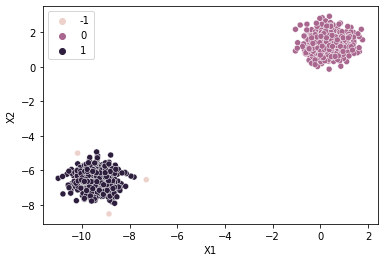

In [8]:
model = DBSCAN()
display_cat(model,two_blobs)
# by defualt eps=0.5

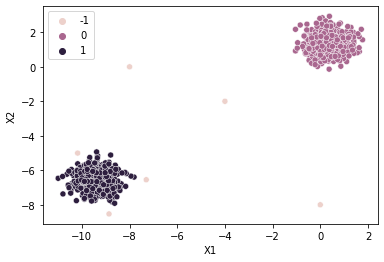

In [9]:
model = DBSCAN()
display_cat(model,two_blobs_outlier)

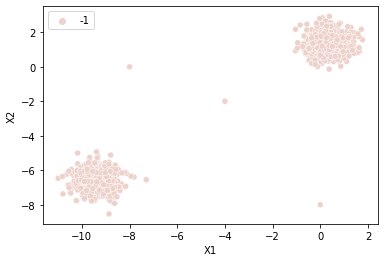

In [10]:
model = DBSCAN(eps=0.001)
display_cat(model,two_blobs_outlier)

In [11]:
# as eps is very tiny then it consider all points to be outliers

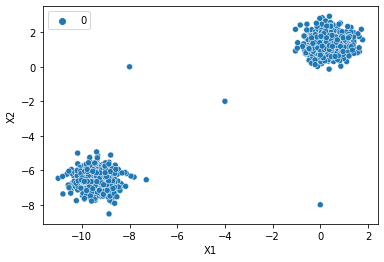

In [12]:
model = DBSCAN(eps=10)
display_cat(model,two_blobs_outlier)

In [13]:
# as eps is too big it consider all points to be in same cluster

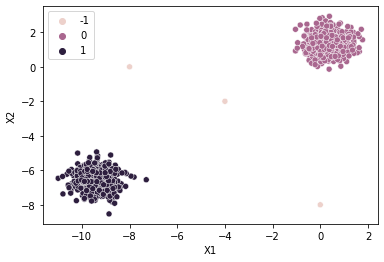

In [14]:
model = DBSCAN(eps=1)
display_cat(model,two_blobs_outlier)

In [15]:
model.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [16]:
np.sum(model.labels_ == -1)

3

In [17]:
# three outliers 

In [18]:
# to find the best esp a loop will created 
outlier_percent =[]
outlier_number =[]
for n in np.linspace(0.001,10,100):
    model =DBSCAN(eps=n)
    model.fit(two_blobs_outlier)
    outlier_number.append(np.sum(model.labels_ == -1))
    percent = 100 * (np.sum(model.labels_ == -1)) / (len(model.labels_))
    outlier_percent.append(percent)

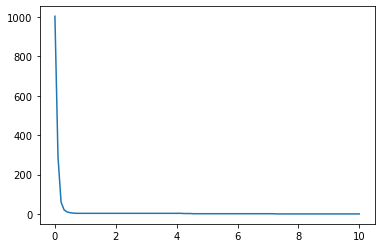

In [19]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_number);

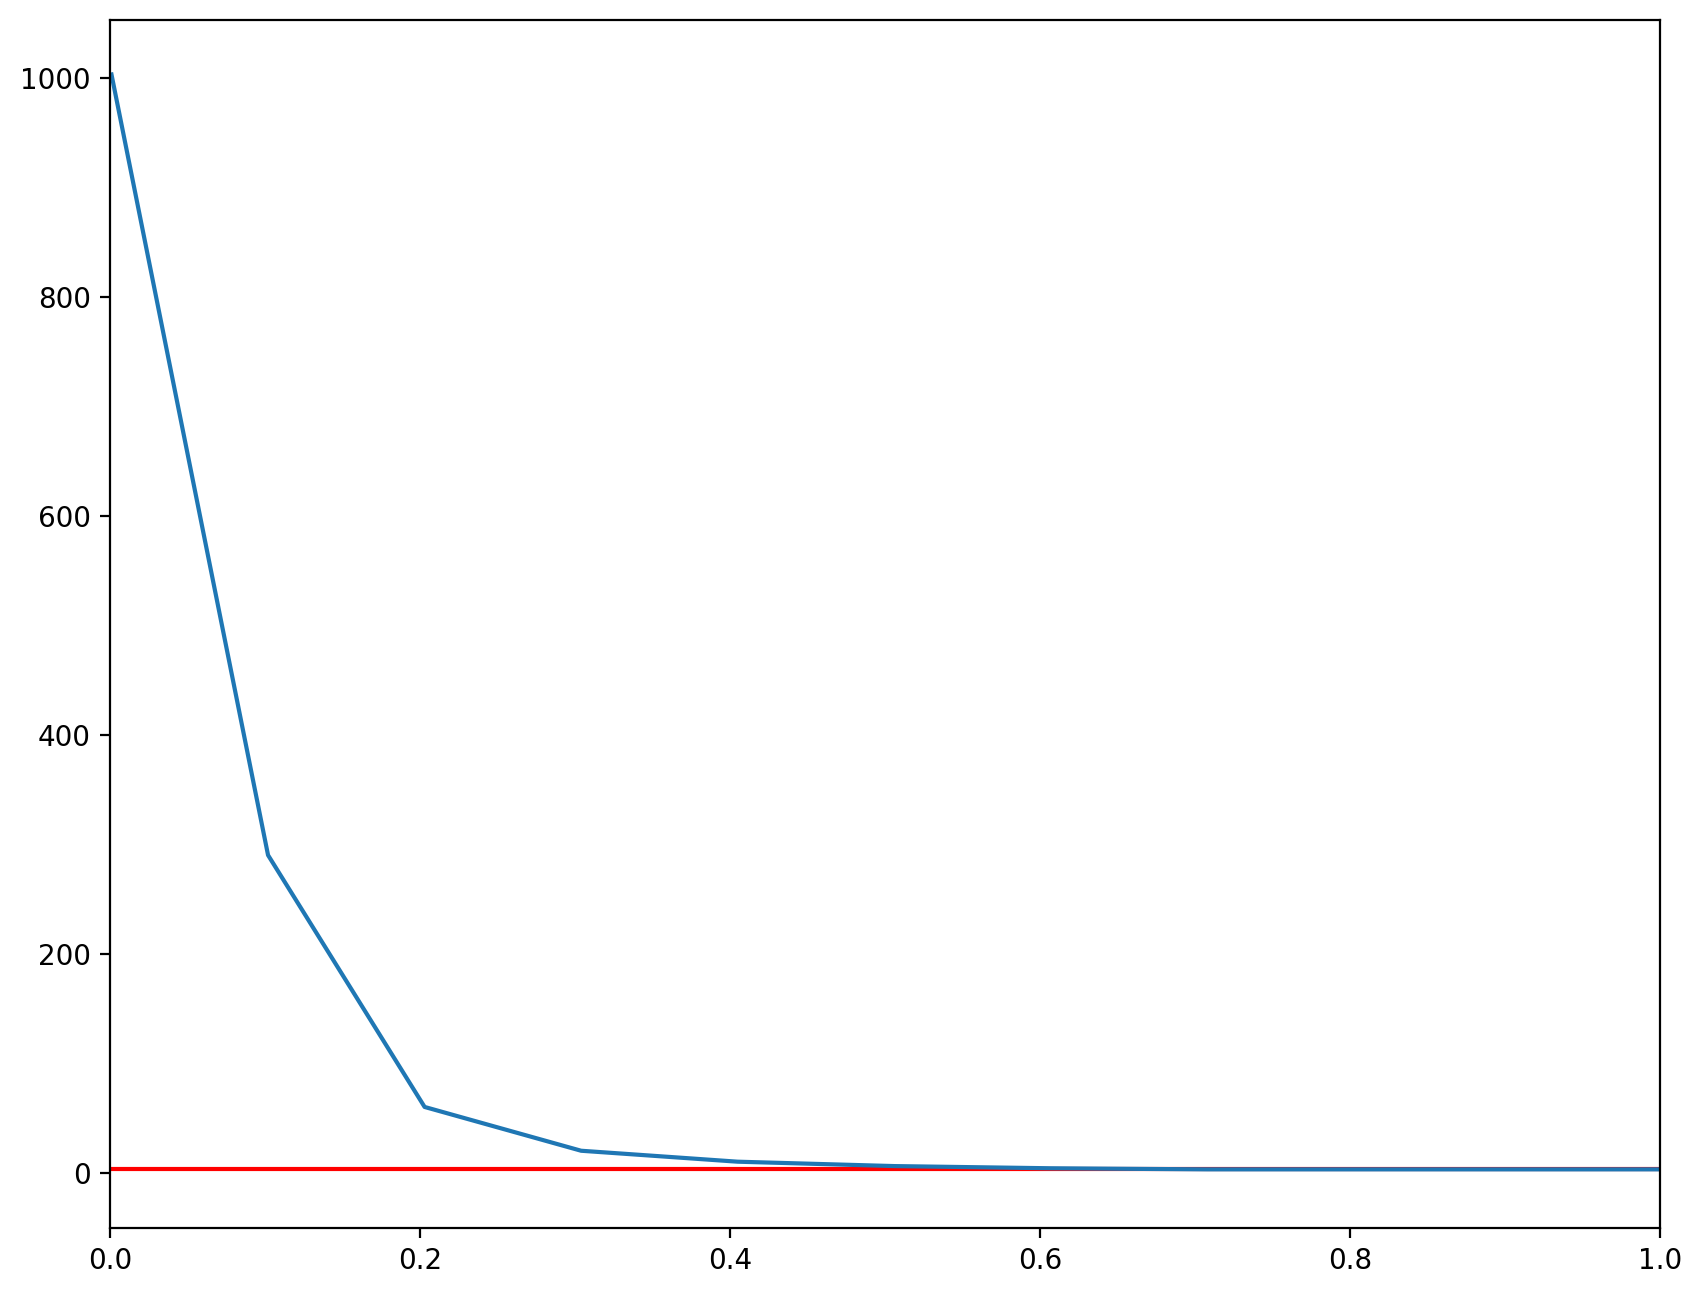

In [20]:
plt.figure(figsize=(10,8), dpi=200)
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_number)
plt.hlines(y=3,xmin=0,xmax=2, color='red')
plt.xlim(0,1);

In [21]:
# the best value for eps = 0.7

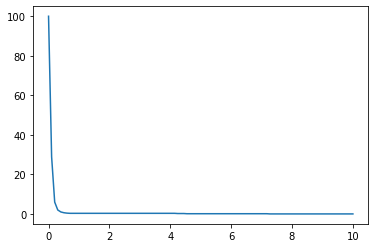

In [22]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent);

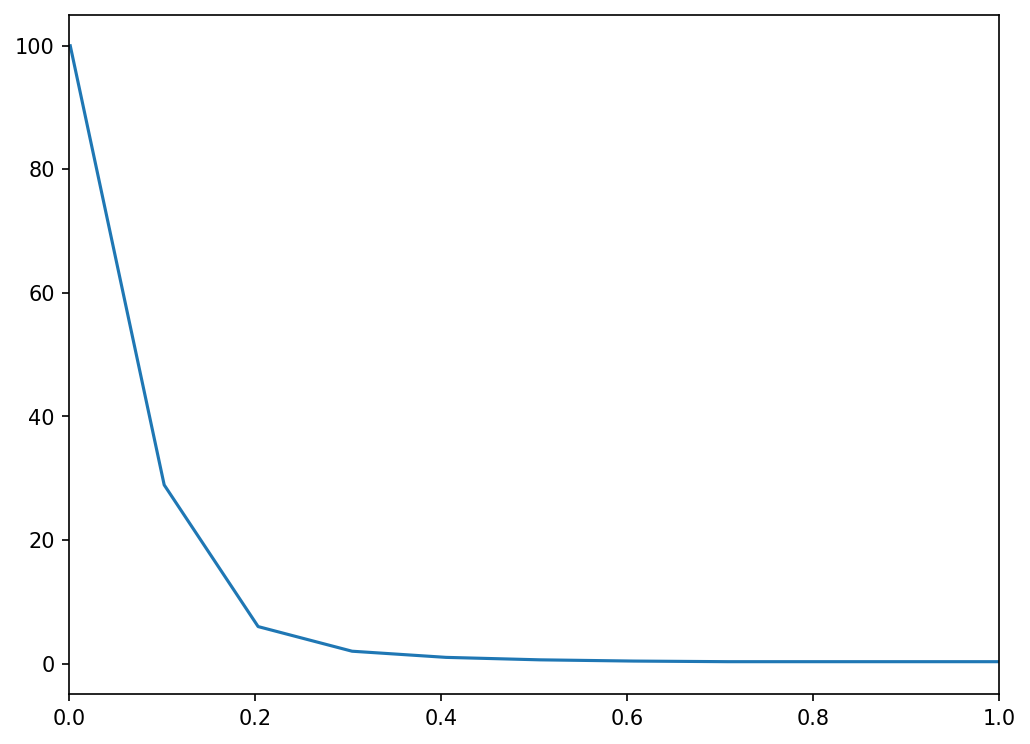

In [23]:
plt.figure(figsize=(8,6), dpi=150)
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.xlim(0,1);

In [24]:
# to test the effect of (min_samples) parameter
# min_samples : int, default=5
#    The number of samples (or total weight) in a neighborhood for a point
#    to be considered as a core point. This includes the point itself.

In [25]:
outlier_percent2 =[]
outlier_number2 =[]
for n in range(1,100):
    model =DBSCAN(min_samples=n)
    model.fit(two_blobs_outlier)
    outlier_number2.append(np.sum(model.labels_ == -1))
    percent = 100 * (np.sum(model.labels_ == -1)) / (len(model.labels_))
    outlier_percent2.append(percent)

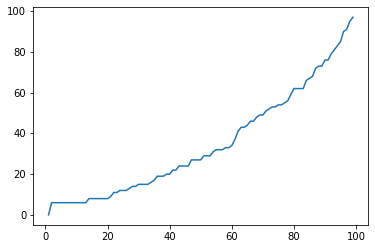

In [26]:
sns.lineplot(x=range(1,100),y=outlier_number2);

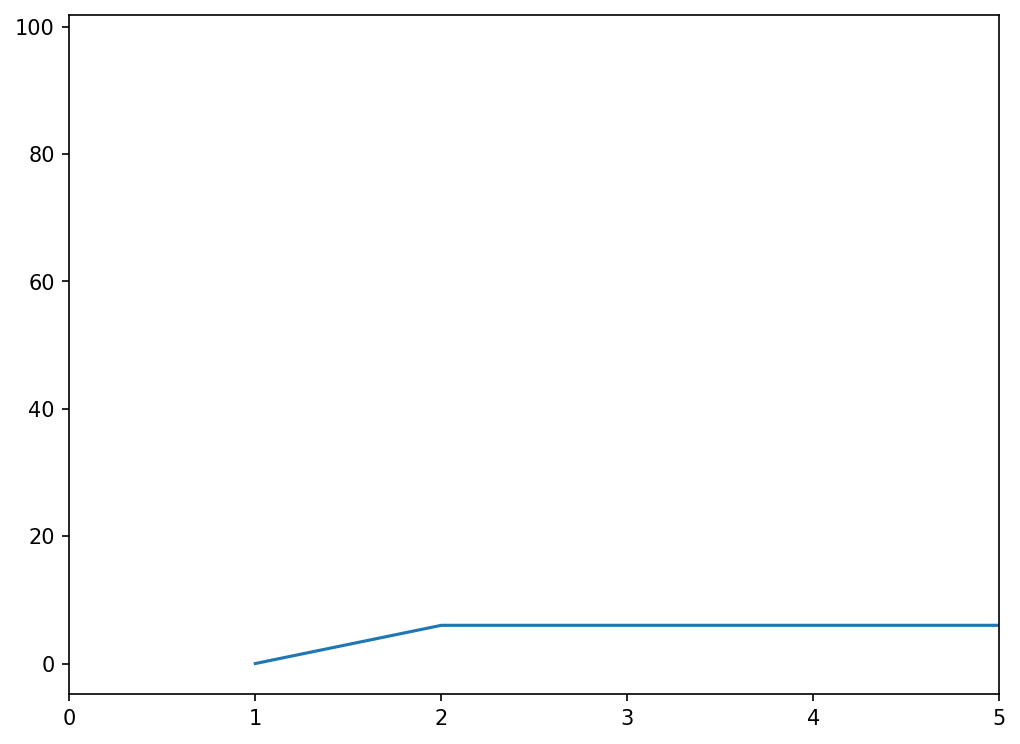

In [27]:
plt.figure(figsize=(8,6), dpi=150)
sns.lineplot(x=range(1,100),y=outlier_number2)
plt.xlim(0,5);

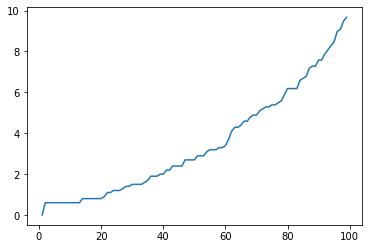

In [28]:
sns.lineplot(x=range(1,100),y=outlier_percent2);

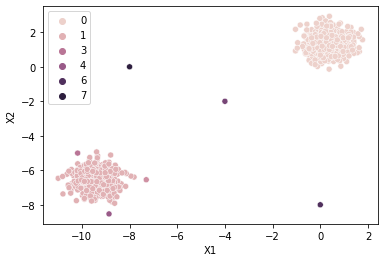

In [29]:
model = DBSCAN(min_samples=1)
display_cat(model,two_blobs_outlier)

In [30]:
# 7 clusters !! it consider 7 different clusters not outliers 

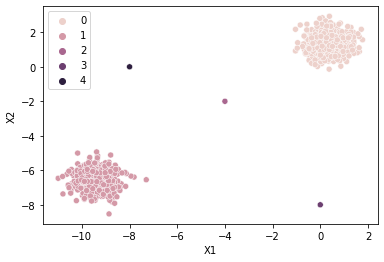

In [31]:
# by choosing the eps equal to 0.6
model = DBSCAN(min_samples=1, eps =0.7)
display_cat(model,two_blobs_outlier)

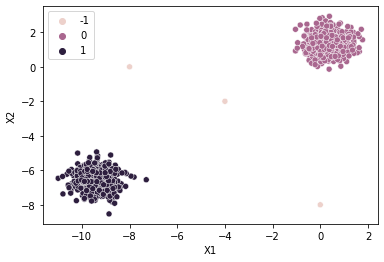

In [32]:
# usually it is good to start with min_samples = 2 * data shape 
model = DBSCAN(min_samples=4, eps =0.7)
display_cat(model,two_blobs_outlier)

In [33]:
# 2 clusters + outliers ! very good result 